# 1. IMPORTAR TODAS LAS LIBRERIAS NECESARIAS


In [1]:
import random
import pandas as pd
import matplotlib.pyplot as plt

# 2. VARIABLES NECESARIAS

In [17]:
Hostnames = []
Dataset = []
df_hostnames = None

# 3. DEFINICION DE FUNCION PARA CREAR HOSTNAMES

In [3]:
def set_hostnames (numero_de_hostnames):
  hostname_sistema_operativo = ["L"]*40 + ["S"]*30 + ["A"]*20 + ["H"]*10
  hostname_entorno = ["D"]*10 + ["I"]*10 + ["T"]*25 + ["S"]*25 + ["P"]*30
  hostname_pais = ["NOR"]*6 + ["FRA"]*9 + ["ITA"]*16 + ["ESP"]*16 + ["DEU"]*23 + ["IRL"]*30
  sufijo_hostname = []

  for i in range(numero_de_hostnames):
    hostname = random.choice(hostname_sistema_operativo) + random.choice(hostname_entorno) + random.choice(hostname_pais)
    sufijo_hostname.append(hostname)

    hostname = hostname + str(sufijo_hostname.count(hostname)).zfill(3)
    Hostnames.append(hostname)



# 4. CREAR UNA FUNCION PARA OBTENER EL S.O DEL HOSTNAME

In [4]:
def get_sistema_operativo (hostname):
  if hostname.startswith ("L"):
    return "Linux"
  elif hostname.startswith ("S"):
    return "Solaris"
  elif hostname.startswith ("A"):
    return "AIX"
  elif hostname.startswith ("H"):
    return "HP-UX"
  else:
    return "Desconocido"

# 5. CREAR UNA FUNCION PARA OBTENER EL ENTORNO DEL HOSTNAME

In [5]:
def get_entorno (hostname):
  hostname_entorno = hostname [1]
  if hostname_entorno == "D":
    return "Development"
  if hostname_entorno == "I":
    return "Integration"
  if hostname_entorno == "T":
    return "Testing"
  if hostname_entorno == "S":
    return "Staging"
  if hostname_entorno == "P":
    return "Production"
  else:
    return "Desconocido"

# 6. CREAR UNA FUNCION PARA OBTENER EL PAIS DEL HOSTNAME

In [6]:
def get_pais (hostname):
  hostname_pais = hostname [2:5]
  if hostname_pais == "NOR":
    return "Norway"
  if hostname_pais == "FRA":
    return "France"
  if hostname_pais == "ITA":
    return "Italy"
  if hostname_pais == "ESP":
    return "Spain"
  if hostname_pais == "DEU":
    return "Germany"
  if hostname_pais == "DEU":
    return "Germany"
  if hostname_pais == "IRL":
    return "Ireland"
  else:
    return "Desconocido"

# 7. FUNCION GENERAR DATAFRAME

In [16]:
def set_dataframe (numero_de_hostnames):
  global df_hostnames

  set_hostnames(numero_de_hostnames)

  for hostname in Hostnames:
    Dataset.append({
        "hostname": hostname,
        "os": get_sistema_operativo(hostname),
        "enviroment": get_entorno(hostname),
        "country": get_pais(hostname),
        "node": (hostname[5:8])
    })

  df_hostnames = pd.DataFrame(Dataset)


# 8. CREAR DATAFRAME

In [18]:
set_dataframe(1500)
df_hostnames

,hostname,os,enviroment,country,node
0,ATIRL001,AIX,Testing,Ireland,001
1,AIFRA001,AIX,Integration,France,001
2,LSESP001,Linux,Staging,Spain,001
3,SIESP001,Solaris,Integration,Spain,001
4,LPIRL001,Linux,Production,Ireland,001
...,...,...,...,...,...
1495,ATFRA009,AIX,Testing,France,009
1496,SSIRL035,Solaris,Staging,Ireland,035
1497,STITA020,Solaris,Testing,Italy,020
1498,SDIRL018,Solaris,Development,Ireland,018


In [9]:
from google.colab import drive
drive.mount('/content/drive')



Mounted at /content/drive


#  9. GUARDAR DATAFRAME EN FICHERO .CSV

In [19]:
df_hostnames.to_csv(
    "/content/drive/MyDrive/Python/Tarea_python_avanzado/Hostnames.csv",
    index = False,
    header = True
)



# 10. GENERAR UN GRAFICO AGRUPANDO LOS HOSTNAMES POR PAISES

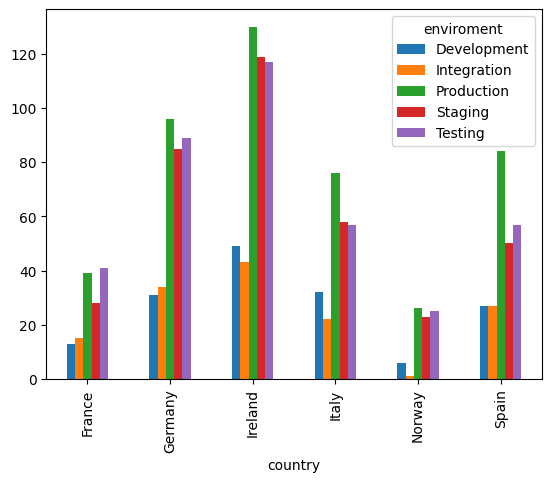

In [21]:
grafico_entorno = df_hostnames.groupby(["country", "enviroment"]).size()
grafico_entorno.unstack().plot(kind="bar");


# 11. CREAR UNA FIGURA CON 4 GRAFICOS EN UNA MALLA DE DOS FILAS Y DOS COLUMNAS

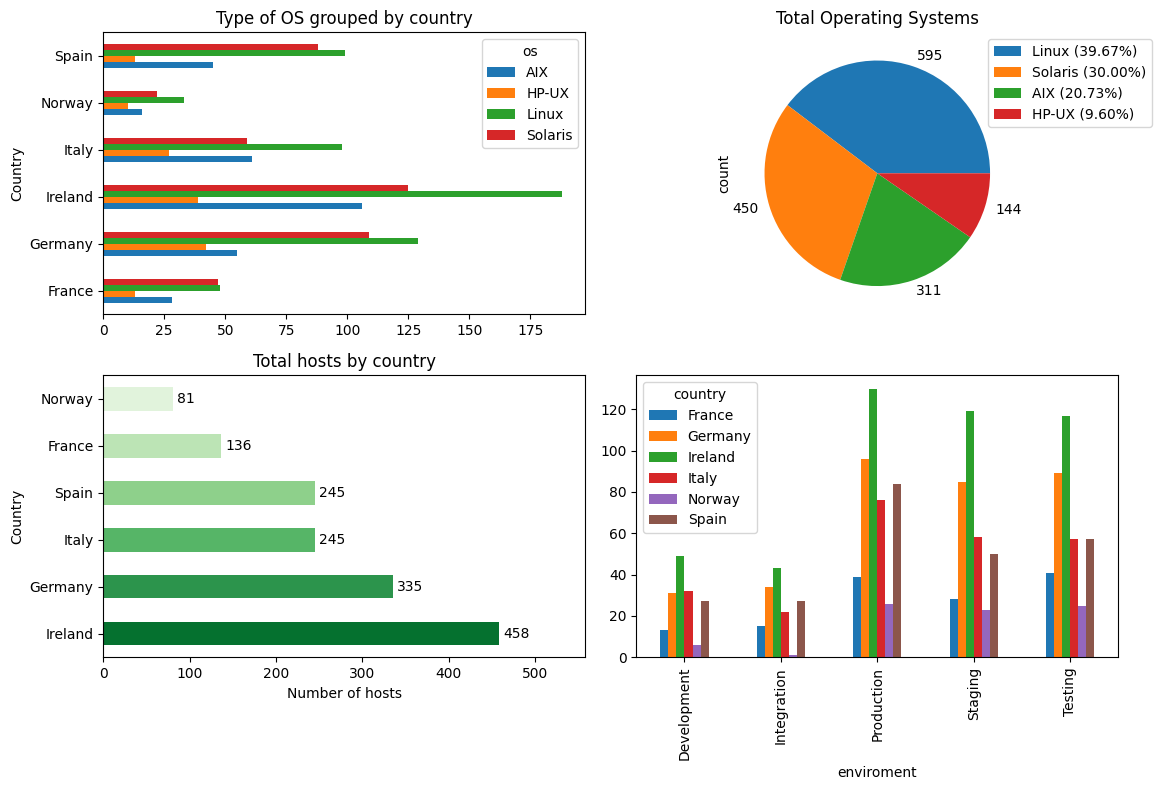

In [22]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# Grafico esquina superior izquierda
ax1_1 = axes[0, 0]
grafico_OS = df_hostnames.groupby(["country", "os"]).size()
grafico_OS.unstack().plot(kind="barh", ax=ax1_1)
ax1_1.set_title("Type of OS grouped by country")
ax1_1.set_ylabel("Country")

# Grafico esquina superior derecha
ax1_2 = axes[0, 1]
os_counts = df_hostnames["os"].value_counts()
total = os_counts.sum()
labels = os_counts.values.astype(str)


Grafico_superior_derecha = os_counts.plot(
    kind="pie",
    labels = labels,
    ax = ax1_2
    )

Grafico_superior_derecha.set_title("Total Operating Systems")

legend_labels = [
    f"{os_name} ({count/total:.2%})"
    for os_name, count in os_counts.items()
]


Grafico_superior_derecha.legend(legend_labels, bbox_to_anchor=(1.5, 1))

# Grafico esquina inferior izquierda

ax2_1 = axes[1, 0]

import seaborn as sns

pais_count = df_hostnames["country"].value_counts()
colors = sns.color_palette("Greens", n_colors=len(pais_count))[::-1]

grafico_inferior_izquierda = pais_count.plot(kind = "barh", color=colors, ax=ax2_1)
eje_x_maximo = pais_count.max() +100

grafico_inferior_izquierda.set_title("Total hosts by country")
grafico_inferior_izquierda.set_xlabel("Number of hosts")
grafico_inferior_izquierda.set_ylabel("Country")

for i, value in enumerate(pais_count):
  grafico_inferior_izquierda.text(
      value + 5,
      i,
      str (value),
      va="center"
  )

grafico_inferior_izquierda.set_xlim(0, eje_x_maximo)

# Grafico esquina inferior derecha

ax2_2 = axes[1, 1]

grafico_entorno = df_hostnames.groupby(["enviroment", "country"]).size()
grafico_entorno.unstack().plot(kind="bar", ax=ax2_2)

plt.tight_layout()
plt.show()